<a href="https://colab.research.google.com/github/ancestor9/Gyeongbok-AI-study/blob/main/2025/%EB%8F%84%EC%9E%A5%EA%B9%A8%EA%B8%B0/07_Feature_Engineering_Selection_Consumer_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: 내 드라이브를 마운트(mount) 하라

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [2]:
file_path = '/content/drive/MyDrive/df_encoded.pkl'
import pandas as pd
df= pd.read_pickle(file_path)
df

,연령,소득,자녀수,평일인터넷,토요일인터넷,일요일인터넷,평일모바일,토요일모바일,일요일모바일,PPL구입여부,...,학력_중학교 재학,학력_중학교 졸업,학력_초등학교 졸업,주거형태_영구임대,주거형태_월세,주거형태_자가,주거형태_전세,결혼여부_기혼,결혼여부_미혼,year_2019
0,-1.809092,0.186346,2,90,105,150,30,30,30,1,...,True,False,False,False,False,True,False,False,True,False
1,-1.809092,1.236526,2,60,60,0,30,30,60,0,...,True,False,False,False,False,True,False,False,True,False
2,-1.809092,0.186346,2,10,30,0,120,180,120,0,...,True,False,False,False,False,True,False,False,True,False
3,-1.809092,1.236526,2,90,90,90,90,120,120,1,...,True,False,False,False,False,False,True,False,True,False
4,-1.809092,0.186346,2,60,105,120,30,60,60,0,...,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.105553,-0.931208,2,60,60,0,60,60,60,1,...,False,True,False,False,False,True,False,False,False,True
7996,1.436763,0.711436,2,60,60,0,30,30,30,0,...,False,False,False,False,False,True,False,True,False,True
7997,1.304279,-0.863834,1,60,60,0,30,30,30,0,...,False,True,False,False,False,False,True,True,False,True
7998,1.701731,-1.914013,2,60,60,0,30,30,30,0,...,False,True,False,False,False,True,False,False,False,True


## [1.13.1. Removing features with low variance](https://scikit-learn.org/stable/modules/feature_selection.html) 을 적용

In [3]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
X

[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

In [4]:
threshold=(.8 * (1 - .8))
print(threshold)

0.15999999999999998


In [5]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [6]:
df.columns

Index(['연령', '소득', '자녀수', '평일인터넷', '토요일인터넷', '일요일인터넷', '평일모바일', '토요일모바일',
       '일요일모바일', 'PPL구입여부',
       ...
       '학력_중학교 재학', '학력_중학교 졸업', '학력_초등학교 졸업', '주거형태_영구임대', '주거형태_월세',
       '주거형태_자가', '주거형태_전세', '결혼여부_기혼', '결혼여부_미혼', 'year_2019'],
      dtype='object', length=101)

<img src ='https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.02-samples-features.png'>

In [7]:
# prompt: 'PPL구입여부'는 y,  나머지 변수에서 year_2019를 제외하고 X로 만들어줘

y = df['PPL구입여부']
X = df.drop(columns=['PPL구입여부', 'year_2019'])


In [8]:
X.head()

,연령,소득,자녀수,평일인터넷,토요일인터넷,일요일인터넷,평일모바일,토요일모바일,일요일모바일,모바일총사용시간,...,학력_정규교육 없음,학력_중학교 재학,학력_중학교 졸업,학력_초등학교 졸업,주거형태_영구임대,주거형태_월세,주거형태_자가,주거형태_전세,결혼여부_기혼,결혼여부_미혼
0,-1.809092,0.186346,2,90,105,150,30,30,30,90,...,False,True,False,False,False,False,True,False,False,True
1,-1.809092,1.236526,2,60,60,0,30,30,60,120,...,False,True,False,False,False,False,True,False,False,True
2,-1.809092,0.186346,2,10,30,0,120,180,120,420,...,False,True,False,False,False,False,True,False,False,True
3,-1.809092,1.236526,2,90,90,90,90,120,120,330,...,False,True,False,False,False,False,False,True,False,True
4,-1.809092,0.186346,2,60,105,120,30,60,60,150,...,False,True,False,False,False,False,True,False,False,True


In [9]:
y.head()

,PPL구입여부
0,1
1,0
2,0
3,1
4,0


## **[Alone in the woods: Using Theil's U for survival](https://www.kaggle.com/code/shakedzy/alone-in-the-woods-using-theil-s-u-for-survival)**

In [10]:
from collections import Counter
import math
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module
import seaborn as sns # Import seaborn for heatmap

In [11]:
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x


TypeError: Image data of dtype object cannot be converted to float

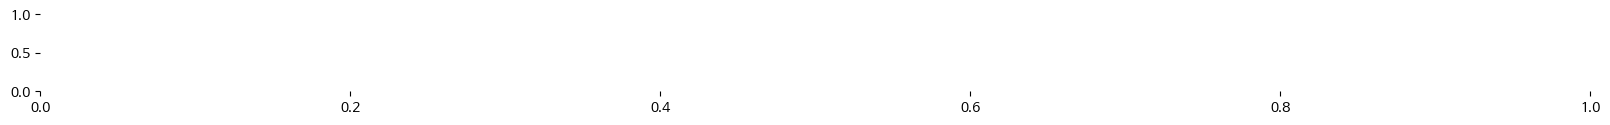

In [12]:
theilu = pd.DataFrame(index=['PPL구입여부'],columns=df.columns)
columns = df.columns
for j in range(0,len(columns)):
    u = theil_u(df['PPL구입여부'].tolist(), df[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u

theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

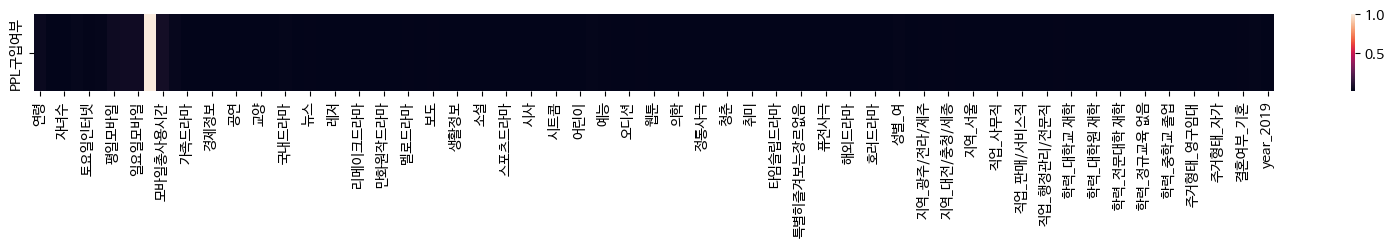

In [15]:
theilu = pd.DataFrame(index=['PPL구입여부'],columns=df.columns)
columns = df.columns
for j in range(0,len(columns)):
    u = theil_u(df['PPL구입여부'].tolist(), df[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u

# Convert all columns of theilu to numeric dtype
theilu = theilu.astype(float) # This line is added to fix the error
#theilu.fillna(value=np.nan,inplace=True)  This line is no longer necessary
plt.figure(figsize=(20,1))
sns.heatmap(theilu)
plt.show()

In [22]:
theilu.T

,PPL구입여부
연령,0.025169
소득,0.002561
자녀수,0.001978
평일인터넷,0.012282
토요일인터넷,0.007362
...,...
주거형태_자가,0.002094
주거형태_전세,0.001627
결혼여부_기혼,0.004717
결혼여부_미혼,0.007909


In [25]:
theilu.T.sort_values(by='PPL구입여부', ascending=False)

,PPL구입여부
PPL구입여부,1.000000e+00
모바일총사용시간,5.296052e-02
일요일모바일,4.059915e-02
토요일모바일,4.054471e-02
평일모바일,3.554050e-02
...,...
학력_전문대학 재학,2.584004e-06
특별히즐겨보는장르없음,2.208118e-06
타임슬립드라마,6.860650e-07
게임,5.574443e-07


<Axes: >

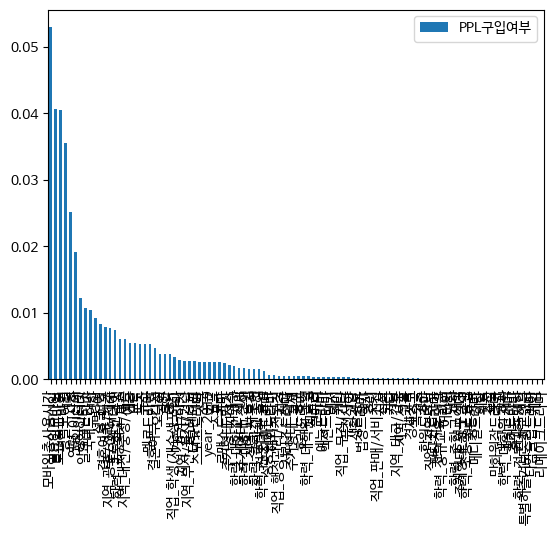

In [28]:
theilu.T.sort_values(by='PPL구입여부', ascending=False)[1:].plot(kind='bar')

In [30]:
# prompt: theilu.T.sort_values(by='PPL구입여부', ascending=False)의 순위가 70% 이상인 변수만 추출해줘

# Assuming 'theilu' DataFrame is already created and sorted as in your provided code.
# ... (your existing code to create and sort theilu DataFrame) ...

# Calculate the 70th percentile of Theil's U values
percentile_70 = theilu.T['PPL구입여부'].quantile(0.7)

# Filter the DataFrame to include only variables with Theil's U above the 70th percentile
selected_variables = theilu.T[theilu.T['PPL구입여부'] >= percentile_70]

selected_variables


,PPL구입여부
연령,0.025169
평일인터넷,0.012282
토요일인터넷,0.007362
일요일인터넷,0.010666
평일모바일,0.035541
토요일모바일,0.040545
일요일모바일,0.040599
PPL구입여부,1.000000
모바일총사용시간,0.052961
연령_이산화,0.019131


In [37]:
df = df[selected_variables.index]
df.head()

,연령,평일인터넷,토요일인터넷,일요일인터넷,평일모바일,토요일모바일,일요일모바일,PPL구입여부,모바일총사용시간,연령_이산화,...,음악,성별_여,지역_경기/인천,지역_광주/전라/제주,지역_대전/충청/세종,지역_부산/울산/경남,직업_학생(재수생포함),학력_고등학교 졸업,결혼여부_기혼,결혼여부_미혼
0,-1.809092,90,105,150,30,30,30,1,90,0.0,...,1,False,False,False,False,False,True,False,False,True
1,-1.809092,60,60,0,30,30,60,0,120,0.0,...,1,False,False,False,False,False,True,False,False,True
2,-1.809092,10,30,0,120,180,120,0,420,0.0,...,1,False,False,False,False,False,True,False,False,True
3,-1.809092,90,90,90,90,120,120,1,330,0.0,...,1,False,False,False,False,False,True,False,False,True
4,-1.809092,60,105,120,30,60,60,0,150,0.0,...,0,False,False,False,False,False,True,False,False,True


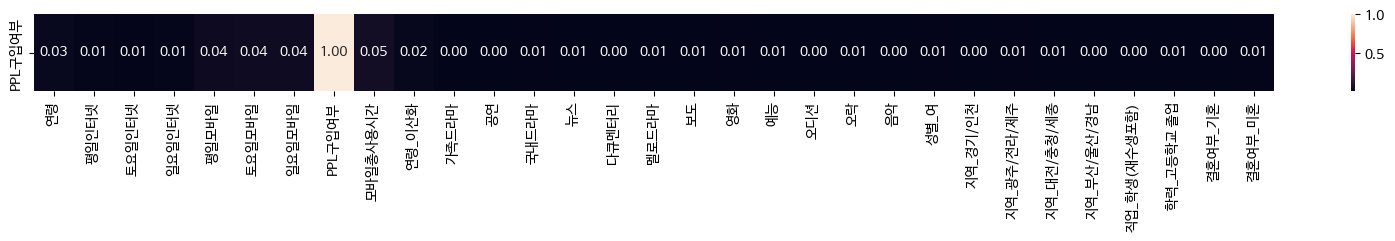

In [39]:
theilu = pd.DataFrame(index=['PPL구입여부'],columns=df.columns)
columns = df.columns
for j in range(0,len(columns)):
    u = theil_u(df['PPL구입여부'].tolist(), df[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u

# Convert all columns of theilu to numeric dtype
theilu = theilu.astype(float) # This line is added to fix the error
#theilu.fillna(value=np.nan,inplace=True)  This line is no longer necessary
plt.figure(figsize=(20,1))
sns.heatmap(theilu, annot=True,fmt='.2f')
plt.show()

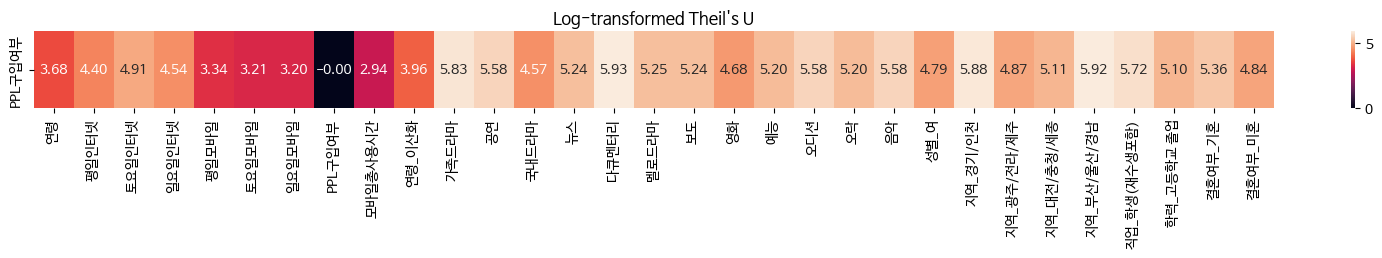

In [41]:
# prompt: theilu 값을 log로 변경하여 다시 시각화 해줘

import matplotlib.pyplot as plt
import numpy as np

# Calculate the log of Theil's U values, handling potential zeros and negative values
theilu_log = theilu.copy()
theilu_log = -np.log(theilu_log + 1e-10) # adding a small value to avoid log(0)

# Visualize the log-transformed Theil's U values using a heatmap
plt.figure(figsize=(20, 1))
sns.heatmap(theilu_log, annot=True, fmt=".2f")
plt.title("Log-transformed Theil's U") # Add a title to the heatmap
plt.show()


### theilu_log = -np.log(theilu_log + 1e-10) # adding a small value to avoid log(0)

In [42]:
# prompt: df를 /content/drive/MyDrive/data에  pickle파일로 저장해줘. 1줄로

df.to_pickle('/content/drive/MyDrive/data/df.pkl')


### **[Pycaret](https://pycaret.org/)**

In [43]:
# prompt: pycaret으로 예측해줘

import pandas as pd
!pip install pycaret

from pycaret.classification import *

# Load the preprocessed data
file_path = '/content/drive/MyDrive/data/df.pkl'
df = pd.read_pickle(file_path)

# Define features (X) and target (y)
y = df['PPL구입여부']
X = df.drop(columns=['PPL구입여부'])

# Initialize PyCaret setup
clf = setup(data=pd.concat([X, y], axis=1), target='PPL구입여부', session_id=123)

# Compare different models
best_model = compare_models()

# Tune the best model
tuned_best_model = tune_model(best_model)

# Evaluate the model
evaluate_model(tuned_best_model)

# Predict on new data (replace with your actual new data)
# predictions = predict_model(tuned_best_model, data=new_data)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 100.1 MB/s eta 0:00:00
   ━━━━

RuntimeError: empty_like method already has a different docstring